In [18]:
#Basic imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data Processing

In [19]:
# Import data
df = pd.read_excel('data.xlsx', 'Timepoint 1', header=1)

In [20]:
def clean_data2(df):
    X = df.copy()
    # Remove columns with only zeros
    X = X.loc[:, (X != 0).any(axis=0)]
    
    # Replace zeros by nan
    X.replace(0, np.nan, inplace=True)
    
    # Replace nan values by mean of column
    X = X.fillna(X.mean())
                 
    # Replace Sex labels by values
    X['Sex'].replace({0:'Male', 1:'Female'}, inplace=True)
    
    # Remove useless columns
    X = X.drop(['Patient ID', 'Batch Process ID'], axis=1)
    
    # Split Sex in Sex_Female and Sex_Male
    X = pd.get_dummies(X)
    
    return X

In [21]:
def scale_data(df):
    X = df.copy()
    # Categorical values
    cater = X[['Sex_Female', 'Sex_Male']]
    # Numerical values
    numer = X.drop(['Sex_Female', 'Sex_Male'], axis=1)
    #Initialize our scaler
    scaler = StandardScaler()
    #Scale each column in numer
    numer = pd.DataFrame(scaler.fit_transform(numer), columns=numer.columns)
    
    X_scaled = pd.concat([numer, cater], axis=1, join='inner')
    return X_scaled

In [22]:
X = clean_data2(df)
X_scaled = scale_data(X)

/var/folders/nb/xkb6gsv52xq9t6plg99f32v80000gn/T/ipykernel_2237/1125858367.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = X.fillna(X.mean())


#### Plot function

In [23]:
def plot_results(y_train, y_test, predict_train, predict_test, params, model):
    pp = PdfPages(f'{model}.pdf')
    params = ", ".join("=".join([key, str(value)]) for key, value in params.items())
    
    # Plot
    plt.figure(figsize=(10,10))
    plt.scatter(np.array(y_train, dtype='int'), predict_train, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(predict_train), max(y_train))
    p2 = min(min(predict_train), min(y_train))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(f'{model}({params})')
    plt.xlabel('Train True Age', fontsize=15)
    plt.ylabel('Train Predicted Age', fontsize=15)
    plt.axis('equal')
    pp.savefig(plt.gcf(), bbox_inches='tight')
    plt.show()


     # Plot
    plt.figure(figsize=(10,10))
    plt.scatter(np.array(y_test, dtype='int'), predict_test, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(predict_test), max(y_test))
    p2 = min(min(predict_test), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.title(f'{model}({params})')
    plt.xlabel('Test True Age', fontsize=15)
    plt.ylabel('Test Predicted Age', fontsize=15)
    plt.axis('equal')
    pp.savefig(plt.gcf(), bbox_inches='tight')
    plt.show()
    
    pp.close()

# K-Means

In [24]:
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer

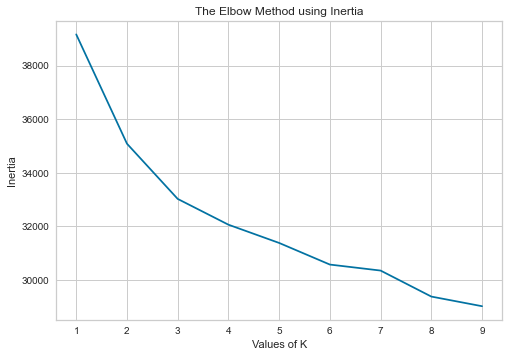

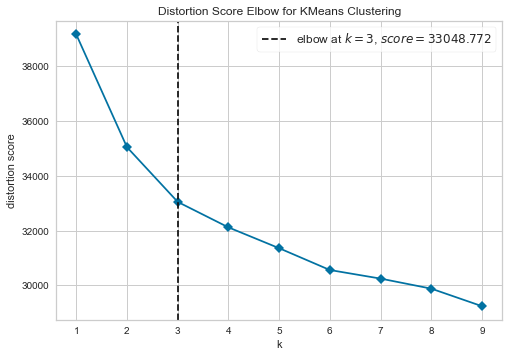

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
K = range(1, 10)
inertias = []
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
    inertias.append(kmeanModel.inertia_)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=K, timings=False)

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [26]:
kmeanModel = KMeans(n_clusters=3).fit(X_scaled)
X_scaled.insert(0, value=kmeanModel.labels_, column='Cluster')

# PCA

In [27]:

from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=10)

pc = pca.fit_transform(X_scaled.drop(['Sex_Female', 'Sex_Male'], axis=1))

In [29]:
X_scaled

,Cluster,Age,[norm] Brain tissue total volume,[norm] 3rd ventricle total volume,[norm] 4th ventricle total volume,[norm] Accumbens area right volume,[norm] Accumbens area left volume,[norm] Amygdala right volume,[norm] Amygdala left volume,[norm] Brain stem total volume,...,[norm] Hippocampus ROI total CN similarity,[norm] Hippocampus ROI total AD similarity,[norm] Hippocampus ROI total FTLD similarity,[norm] Hippocampus ROI total DLB similarity,[norm] Frontal ROI total CN similarity,[norm] Frontal ROI total AD similarity,[norm] Frontal ROI total FTLD similarity,[norm] Frontal ROI total DLB similarity,Sex_Female,Sex_Male
0,2,1.287748,0.480922,-0.663050,0.362989,0.415506,1.021022,0.361992,0.399141,-0.429232,...,0.537622,-0.326933,-0.912154,0.519301,-0.381228,-0.015282,-0.070934,0.812243,1,0
1,1,-0.134764,-0.784529,-0.429414,-1.784112,-1.039827,-1.084120,-2.792113,-1.700631,0.797189,...,0.699067,-0.264156,0.060779,-1.157361,-1.680973,-0.072236,1.356935,1.322242,1,0
2,0,-0.419267,-1.049110,1.129154,-0.079246,-0.404751,-0.602015,0.191827,0.193500,0.135211,...,0.000000,1.147044,0.987424,0.204174,-1.682114,1.526454,0.636389,-0.707151,0,1
3,0,2.710261,-1.537504,-0.609169,-1.747616,0.197424,-0.126281,-0.997851,0.244028,-0.315262,...,-1.154290,0.637910,0.190330,0.872108,-0.206695,-0.013672,0.526804,-0.317394,1,0
4,1,1.572251,-0.539561,1.995059,2.852872,-0.500203,0.275641,1.684504,0.147393,0.789115,...,-1.093302,1.717189,-0.431916,-1.226076,-0.997548,0.945069,0.350360,-0.457634,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,0.718743,-0.934361,0.442417,1.113246,0.398311,1.810035,0.326330,1.161226,-1.363788,...,-0.303738,1.176499,-1.445711,-0.583364,-0.058272,0.740849,-0.336452,-0.832907,1,0
129,1,-0.134764,-0.046796,0.178249,1.232042,-1.211324,-0.404699,-0.443263,-0.112599,-0.783148,...,-0.848008,0.069538,-1.109103,3.069540,1.018450,-0.443162,-0.476992,-0.353085,1,0
130,1,-0.134764,-0.188526,-0.991722,0.979995,0.226590,-0.072706,-0.240984,-0.065529,2.043577,...,0.075629,0.410499,-0.223585,-1.013326,0.046133,0.919470,-1.617052,0.382257,0,1
131,0,-0.134764,-2.646636,1.463071,-0.487266,0.011691,0.467150,-0.202663,-1.297979,-0.636238,...,-1.375783,0.955452,-0.378464,1.276074,-1.243540,-0.721939,1.211368,1.954965,1,0


In [30]:
df = pd.DataFrame(data = pc, 
                  columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

target = X_scaled['Cluster']

result_df = pd.concat([df, target], axis=1)
result_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster
0,0.474588,4.061781,-3.372415,-2.352141,5.997576,-3.070630,-1.139057,0.348581,-2.087365,-1.322973,2
1,6.360449,-7.880554,0.108728,5.092843,1.251373,4.567336,4.366607,-0.645035,-4.025794,1.394358,1
2,8.172366,4.662512,5.279666,-6.791686,-2.998180,9.244765,3.288412,-3.145375,1.188026,5.345241,0
3,7.589654,6.478352,-3.470282,-2.077512,14.186274,-1.333596,2.025702,-2.512370,-0.051245,3.377491,0
4,0.901592,-2.507186,1.545268,-6.855153,-4.749269,-0.919781,-0.154755,-0.563465,-4.239641,-0.613904,1


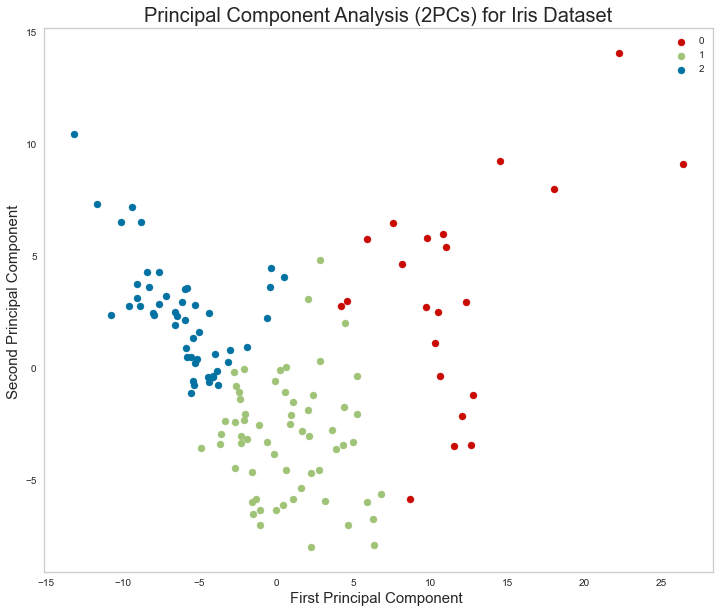

In [31]:
# Visualize Principal Components with a scatter plot
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) for Iris Dataset', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = result_df['Cluster'] == target
    ax.scatter(result_df.loc[indicesToKeep, 'PC1'], 
               result_df.loc[indicesToKeep, 'PC2'],
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

[None, None]

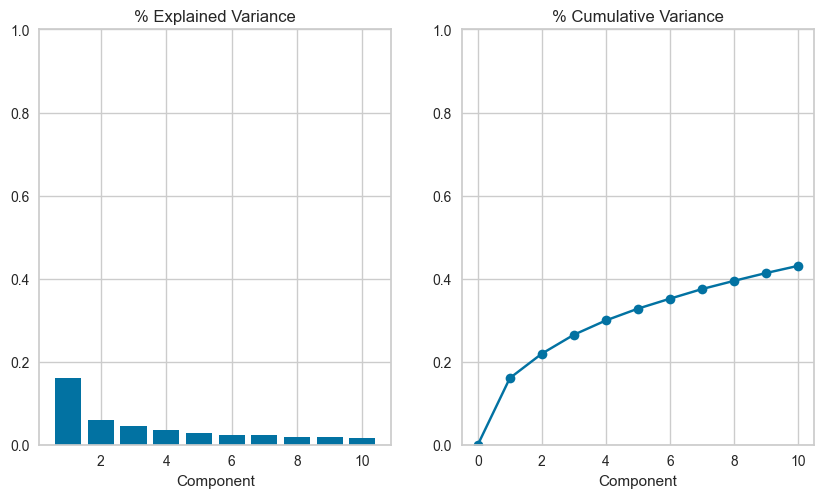

In [32]:
# Create figure
fig, axs = plt.subplots(1, 2)
n = pca.n_components_
grid = np.arange(1, n + 1)
# Explained variance
evr = pca.explained_variance_ratio_
axs[0].bar(grid, evr)
axs[0].set(
    xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
)
# Cumulative Variance
cv = np.cumsum(evr)
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(
    xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
)
# Set up figure
fig.set(figwidth=10, dpi=100)

In [89]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(pc, X['Age', discrete_features=False])

(133, 10)


# Elastic Net

In [ ]:
# Visualize Principal Components with a scatter plot
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) for Iris Dataset', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = iris['target'] == target
    ax.scatter(result_df.loc[indicesToKeep, 'PC1'], 
               result_df.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

In [43]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RepeatedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings("ignore")

In [8]:
x = X_scaled.drop(['Age'], axis=1)
y = X['Age']

### Grid Search - Polynomial Features

In [54]:
poly = PolynomialFeatures(2)
poly_x = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(poly_x, y, test_size=0.3, random_state=42)

# Define pipeline
pipe = Pipeline(steps=[
    ('select', SelectKBest(f_regression, k=10)),
    ('elastic', ElasticNet())
])

# Define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

# Define grid
grid = {
    'select__k': [10, 50, 1000, 10000, 'all'],
    #'select__k': [500, 2000, 10000, 'all'],
    'elastic__alpha': [1e-4, 1e-3, 1e-2, 1e-1],
    'elastic__l1_ratio': np.logspace(-4, 0, 6)
}
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    search_elastic = GridSearchCV(pipe, grid, cv=cv, n_jobs=3, verbose=1, scoring='neg_mean_absolute_error')
search_elastic.fit(x_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_sele

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.629e+01, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.522e+01, tolerance: 9.231e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e+01, tolerance: 8.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.295e+01, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.833e+01, tolerance: 7.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.162e-01, tolerance: 9.231e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.564e-01, tolerance: 7.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e-01, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.324e+02, tolerance: 1.001e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.738e+01, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e-01, tolerance: 8.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.568e-01, tolerance: 9.911e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.364e-01, tolerance: 8.926e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.715e+01, tolerance: 9.231e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.813e-01, tolerance: 1.001e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.604e-01, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.371e-01, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.304e-01, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.588e+01, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.207e+01, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.851e-01, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.551e-01, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e-01, tolerance: 8.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.386e-01, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.403e-01, tolerance: 8.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.153e+01, tolerance: 8.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.845e-01, tolerance: 8.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.774e-01, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.088e-01, tolerance: 1.013e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.042e-01, tolerance: 9.911e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.861e-01, tolerance: 7.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.740e-01, tolerance: 9.231e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.108e-01, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.088e-01, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.588e-01, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.089e-01, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.991e+01, tolerance: 1.001e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.183e-01, tolerance: 1.001e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.356e-01, tolerance: 8.926e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.355e-01, tolerance: 8.926e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.850e-01, tolerance: 1.001e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.271e-01, tolerance: 1.001e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.660e-01, tolerance: 9.231e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.003e-01, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.338e-01, tolerance: 8.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.550e-01, tolerance: 1.013e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.472e-01, tolerance: 9.911e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.792e-01, tolerance: 9.911e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.776e-01, tolerance: 1.013e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.673e-01, tolerance: 1.001e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.321e-01, tolerance: 9.231e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.223e-01, tolerance: 7.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.801e-01, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.436e-01, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.455e-01, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.215e-01, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.406e-01, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.190e-01, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.478e-01, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.241e-01, tolerance: 7.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+00, tolerance: 

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.948e-01, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.420e-01, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.773e-01, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.882e-01, tolerance: 7.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.823e-01, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e-01, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.633e-01, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.098e+00, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.245e+00, tolerance: 9.911e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+00, tolerance: 8.926e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.109e+00, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.335e+00, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.038e+00, tolerance: 7.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.870e+00, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.652e+00, tolerance: 1.015e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.351e+00, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e+00, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.765e+00, tolerance: 

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+00, tolerance: 8.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.288e+00, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.998e+00, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.770e+00, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.344e+00, tolerance: 8.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.822e+00, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklea

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.622e-01, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.004e-01, tolerance: 8.767e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.322e-01, tolerance: 

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.834e-01, tolerance: 8.514e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.037e+00, tolerance: 8.184e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarni

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=Pipeline(steps=[('select',
                                        SelectKBest(score_func=<function f_regression at 0x15ec01a60>)),
                                       ('elastic', ElasticNet())]),
             n_jobs=3,
             param_grid={'elastic__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'elastic__l1_ratio': array([1.00000000e-04, 6.30957344e-04, 3.98107171e-03, 2.51188643e-02,
       1.58489319e-01, 1.00000000e+00]),
                         'select__k': [10, 50, 1000, 10000, 'all']},
             scoring='neg_mean_absolute_error', verbose=1)

In [55]:
print(search_elastic.best_estimator_)
print(search_elastic.best_score_)

Pipeline(steps=[('select',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x15ec01a60>)),
                ('elastic',
                 ElasticNet(alpha=0.001, l1_ratio=0.15848931924611143))])
-2.6357700753170064


(133, 44253)
[k=all, alpha=0.001, l1_ratio=0.15848931924611143] train_score: 0.0003994233612747995
[k=all, alpha=0.001, l1_ratio=0.15848931924611143] test_score: 2.473532815136815


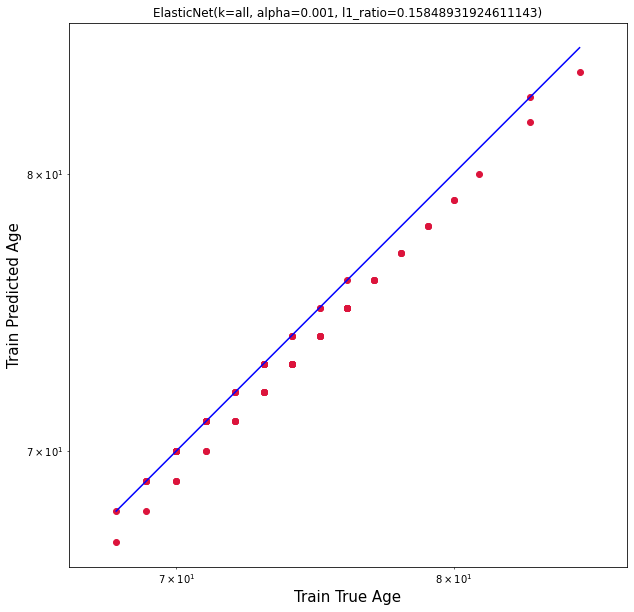

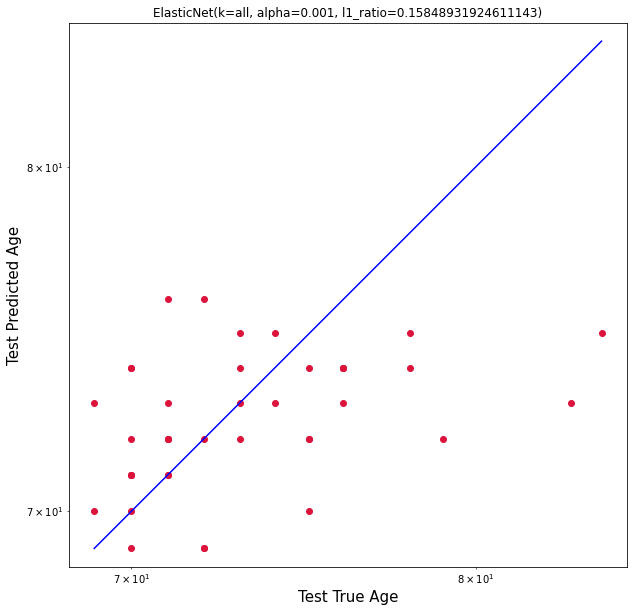

In [56]:
print(poly_x.shape)

elastic_best = search_elastic.best_estimator_

# Predict age
predict_train = elastic_best.predict(x_train)
predict_test = elastic_best.predict(x_test)

# Compute error
train_error = predict_train - y_train
test_error = predict_test - y_test

train_score = mean_absolute_error(y_train, predict_train)
test_score = mean_absolute_error(y_test, predict_test)

print(f'[k={elastic_best.steps[0][1].get_params()["k"]}, alpha={elastic_best.steps[1][1].get_params()["alpha"]}, l1_ratio={elastic_best.steps[1][1].get_params()["l1_ratio"]}] train_score: {train_score}')
print(f'[k={elastic_best.steps[0][1].get_params()["k"]}, alpha={elastic_best.steps[1][1].get_params()["alpha"]}, l1_ratio={elastic_best.steps[1][1].get_params()["l1_ratio"]}] test_score: {test_score}')

plot_results(y_train, y_test, predict_train, predict_test, {
    'k': elastic_best.steps[0][1].get_params()["k"],
    'alpha': elastic_best.steps[1][1].get_params()["alpha"],
    'l1_ratio': elastic_best.steps[1][1].get_params()["l1_ratio"]
}, 'ElasticNet')

# Random Forest

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RepeatedKFold
from matplotlib.backends.backend_pdf import PdfPages

## Grid Search - Polynomial Features

In [36]:
poly = PolynomialFeatures(2)
poly_x = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(poly_x, y, test_size=0.3, random_state=42)

# Define pipeline
forest_pipe = Pipeline(steps=[
    ('select', SelectKBest(f_regression, k=10)),
    ('regressor', RandomForestRegressor(random_state=42))
])

grid = {
    'select__k': [50, 1000, 'all'],
    'regressor__max_depth': [5, 10, 15]
}
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

random_forest_search = GridSearchCV(forest_pipe, grid, cv=cv, n_jobs=1, verbose=10, scoring='neg_mean_absolute_error')
random_forest_search.fit(x_train, y_train)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
[CV 1/15; 1/9] START regressor__max_depth=5, select__k=50.......................
[CV 1/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-3.835 total time=   0.2s
[CV 2/15; 1/9] START regressor__max_depth=5, select__k=50.......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 2/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-3.024 total time=   0.2s
[CV 3/15; 1/9] START regressor__max_depth=5, select__k=50.......................
[CV 3/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-2.275 total time=   0.1s
[CV 4/15; 1/9] START regressor__max_depth=5, select__k=50.......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 4/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-2.193 total time=   0.2s
[CV 5/15; 1/9] START regressor__max_depth=5, select__k=50.......................
[CV 5/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-2.500 total time=   0.1s
[CV 6/15; 1/9] START regressor__max_depth=5, select__k=50.......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 6/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-2.652 total time=   0.2s
[CV 7/15; 1/9] START regressor__max_depth=5, select__k=50.......................
[CV 7/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-3.381 total time=   0.2s
[CV 8/15; 1/9] START regressor__max_depth=5, select__k=50.......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 8/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-3.210 total time=   0.2s
[CV 9/15; 1/9] START regressor__max_depth=5, select__k=50.......................
[CV 9/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-2.920 total time=   0.2s
[CV 10/15; 1/9] START regressor__max_depth=5, select__k=50......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 10/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-2.201 total time=   0.2s
[CV 11/15; 1/9] START regressor__max_depth=5, select__k=50......................
[CV 11/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-2.918 total time=   0.1s
[CV 12/15; 1/9] START regressor__max_depth=5, select__k=50......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 12/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-3.096 total time=   0.2s
[CV 13/15; 1/9] START regressor__max_depth=5, select__k=50......................
[CV 13/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-2.487 total time=   0.2s
[CV 14/15; 1/9] START regressor__max_depth=5, select__k=50......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 14/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-3.342 total time=   0.2s
[CV 15/15; 1/9] START regressor__max_depth=5, select__k=50......................
[CV 15/15; 1/9] END regressor__max_depth=5, select__k=50;, score=-2.118 total time=   0.2s
[CV 1/15; 2/9] START regressor__max_depth=5, select__k=1000.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 1/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-3.557 total time=   0.7s
[CV 2/15; 2/9] START regressor__max_depth=5, select__k=1000.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 2/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-3.065 total time=   0.7s
[CV 3/15; 2/9] START regressor__max_depth=5, select__k=1000.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 3/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-2.088 total time=   0.7s
[CV 4/15; 2/9] START regressor__max_depth=5, select__k=1000.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 4/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-2.688 total time=   0.7s
[CV 5/15; 2/9] START regressor__max_depth=5, select__k=1000.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 5/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-2.745 total time=   0.7s
[CV 6/15; 2/9] START regressor__max_depth=5, select__k=1000.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 6/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-2.496 total time=   0.7s
[CV 7/15; 2/9] START regressor__max_depth=5, select__k=1000.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 7/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-3.142 total time=   0.7s
[CV 8/15; 2/9] START regressor__max_depth=5, select__k=1000.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 8/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-3.448 total time=   0.7s
[CV 9/15; 2/9] START regressor__max_depth=5, select__k=1000.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 9/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-3.024 total time=   0.7s
[CV 10/15; 2/9] START regressor__max_depth=5, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 10/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-1.677 total time=   0.7s
[CV 11/15; 2/9] START regressor__max_depth=5, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 11/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-2.838 total time=   0.7s
[CV 12/15; 2/9] START regressor__max_depth=5, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 12/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-2.923 total time=   0.7s
[CV 13/15; 2/9] START regressor__max_depth=5, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 13/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-2.247 total time=   0.7s
[CV 14/15; 2/9] START regressor__max_depth=5, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 14/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-3.067 total time=   0.7s
[CV 15/15; 2/9] START regressor__max_depth=5, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 15/15; 2/9] END regressor__max_depth=5, select__k=1000;, score=-2.387 total time=   0.7s
[CV 1/15; 3/9] START regressor__max_depth=5, select__k=all......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 1/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-3.760 total time=  29.4s
[CV 2/15; 3/9] START regressor__max_depth=5, select__k=all......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 2/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-2.826 total time=  26.8s
[CV 3/15; 3/9] START regressor__max_depth=5, select__k=all......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 3/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-2.204 total time=  28.4s
[CV 4/15; 3/9] START regressor__max_depth=5, select__k=all......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 4/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-2.652 total time=  27.1s
[CV 5/15; 3/9] START regressor__max_depth=5, select__k=all......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 5/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-2.404 total time=  26.1s
[CV 6/15; 3/9] START regressor__max_depth=5, select__k=all......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 6/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-2.317 total time=  25.7s
[CV 7/15; 3/9] START regressor__max_depth=5, select__k=all......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 7/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-2.946 total time=  26.7s
[CV 8/15; 3/9] START regressor__max_depth=5, select__k=all......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 8/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-3.409 total time=  27.3s
[CV 9/15; 3/9] START regressor__max_depth=5, select__k=all......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 9/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-3.148 total time=  29.1s
[CV 10/15; 3/9] START regressor__max_depth=5, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 10/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-1.990 total time=  27.3s
[CV 11/15; 3/9] START regressor__max_depth=5, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 11/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-2.817 total time=  26.6s
[CV 12/15; 3/9] START regressor__max_depth=5, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 12/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-3.128 total time=  25.8s
[CV 13/15; 3/9] START regressor__max_depth=5, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 13/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-2.185 total time=  26.6s
[CV 14/15; 3/9] START regressor__max_depth=5, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 14/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-3.054 total time=  27.3s
[CV 15/15; 3/9] START regressor__max_depth=5, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 15/15; 3/9] END regressor__max_depth=5, select__k=all;, score=-2.366 total time=  26.9s
[CV 1/15; 4/9] START regressor__max_depth=10, select__k=50......................
[CV 1/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-3.897 total time=   0.1s
[CV 2/15; 4/9] START regressor__max_depth=10, select__k=50......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 2/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-3.069 total time=   0.2s
[CV 3/15; 4/9] START regressor__max_depth=10, select__k=50......................
[CV 3/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-2.290 total time=   0.1s
[CV 4/15; 4/9] START regressor__max_depth=10, select__k=50......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 4/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-2.130 total time=   0.2s
[CV 5/15; 4/9] START regressor__max_depth=10, select__k=50......................
[CV 5/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-2.517 total time=   0.2s
[CV 6/15; 4/9] START regressor__max_depth=10, select__k=50......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 6/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-2.729 total time=   0.2s
[CV 7/15; 4/9] START regressor__max_depth=10, select__k=50......................
[CV 7/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-3.404 total time=   0.2s
[CV 8/15; 4/9] START regressor__max_depth=10, select__k=50......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 8/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-3.266 total time=   0.2s
[CV 9/15; 4/9] START regressor__max_depth=10, select__k=50......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 9/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-2.897 total time=   0.2s
[CV 10/15; 4/9] START regressor__max_depth=10, select__k=50.....................
[CV 10/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-2.248 total time=   0.2s
[CV 11/15; 4/9] START regressor__max_depth=10, select__k=50.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 11/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-2.943 total time=   0.2s
[CV 12/15; 4/9] START regressor__max_depth=10, select__k=50.....................
[CV 12/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-3.124 total time=   0.2s
[CV 13/15; 4/9] START regressor__max_depth=10, select__k=50.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 13/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-2.498 total time=   0.2s
[CV 14/15; 4/9] START regressor__max_depth=10, select__k=50.....................
[CV 14/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-3.458 total time=   0.2s
[CV 15/15; 4/9] START regressor__max_depth=10, select__k=50.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 15/15; 4/9] END regressor__max_depth=10, select__k=50;, score=-2.036 total time=   0.2s
[CV 1/15; 5/9] START regressor__max_depth=10, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 1/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-3.583 total time=   0.7s
[CV 2/15; 5/9] START regressor__max_depth=10, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 2/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-3.083 total time=   0.8s
[CV 3/15; 5/9] START regressor__max_depth=10, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 3/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-2.051 total time=   0.8s
[CV 4/15; 5/9] START regressor__max_depth=10, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 4/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-2.677 total time=   0.8s
[CV 5/15; 5/9] START regressor__max_depth=10, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 5/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-2.765 total time=   0.7s
[CV 6/15; 5/9] START regressor__max_depth=10, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 6/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-2.501 total time=   0.7s
[CV 7/15; 5/9] START regressor__max_depth=10, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 7/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-3.129 total time=   0.7s
[CV 8/15; 5/9] START regressor__max_depth=10, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 8/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-3.451 total time=   0.8s
[CV 9/15; 5/9] START regressor__max_depth=10, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 9/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-3.045 total time=   0.8s
[CV 10/15; 5/9] START regressor__max_depth=10, select__k=1000...................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 10/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-1.695 total time=   0.8s
[CV 11/15; 5/9] START regressor__max_depth=10, select__k=1000...................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 11/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-2.817 total time=   0.7s
[CV 12/15; 5/9] START regressor__max_depth=10, select__k=1000...................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 12/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-2.969 total time=   0.8s
[CV 13/15; 5/9] START regressor__max_depth=10, select__k=1000...................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 13/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-2.183 total time=   0.8s
[CV 14/15; 5/9] START regressor__max_depth=10, select__k=1000...................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 14/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-3.078 total time=   0.7s
[CV 15/15; 5/9] START regressor__max_depth=10, select__k=1000...................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 15/15; 5/9] END regressor__max_depth=10, select__k=1000;, score=-2.370 total time=   0.8s
[CV 1/15; 6/9] START regressor__max_depth=10, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 1/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-3.731 total time=  27.2s
[CV 2/15; 6/9] START regressor__max_depth=10, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 2/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-2.825 total time=  26.8s
[CV 3/15; 6/9] START regressor__max_depth=10, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 3/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-2.201 total time=  28.6s
[CV 4/15; 6/9] START regressor__max_depth=10, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 4/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-2.670 total time=  28.1s
[CV 5/15; 6/9] START regressor__max_depth=10, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 5/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-2.426 total time=  28.2s
[CV 6/15; 6/9] START regressor__max_depth=10, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 6/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-2.308 total time=  27.3s
[CV 7/15; 6/9] START regressor__max_depth=10, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 7/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-2.931 total time=  27.0s
[CV 8/15; 6/9] START regressor__max_depth=10, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 8/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-3.399 total time=  28.0s
[CV 9/15; 6/9] START regressor__max_depth=10, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 9/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-3.198 total time=  28.3s
[CV 10/15; 6/9] START regressor__max_depth=10, select__k=all....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 10/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-2.002 total time=  28.9s
[CV 11/15; 6/9] START regressor__max_depth=10, select__k=all....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 11/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-2.836 total time=  28.0s
[CV 12/15; 6/9] START regressor__max_depth=10, select__k=all....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 12/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-3.115 total time=  27.8s
[CV 13/15; 6/9] START regressor__max_depth=10, select__k=all....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 13/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-2.234 total time=  28.2s
[CV 14/15; 6/9] START regressor__max_depth=10, select__k=all....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 14/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-3.054 total time=  28.5s
[CV 15/15; 6/9] START regressor__max_depth=10, select__k=all....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 15/15; 6/9] END regressor__max_depth=10, select__k=all;, score=-2.332 total time=  29.1s
[CV 1/15; 7/9] START regressor__max_depth=15, select__k=50......................
[CV 1/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-3.906 total time=   0.1s
[CV 2/15; 7/9] START regressor__max_depth=15, select__k=50......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 2/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-3.086 total time=   0.2s
[CV 3/15; 7/9] START regressor__max_depth=15, select__k=50......................
[CV 3/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-2.303 total time=   0.1s
[CV 4/15; 7/9] START regressor__max_depth=15, select__k=50......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 4/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-2.136 total time=   0.1s
[CV 5/15; 7/9] START regressor__max_depth=15, select__k=50......................
[CV 5/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-2.503 total time=   0.2s
[CV 6/15; 7/9] START regressor__max_depth=15, select__k=50......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 6/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-2.715 total time=   0.2s
[CV 7/15; 7/9] START regressor__max_depth=15, select__k=50......................
[CV 7/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-3.405 total time=   0.1s
[CV 8/15; 7/9] START regressor__max_depth=15, select__k=50......................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 8/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-3.271 total time=   0.2s
[CV 9/15; 7/9] START regressor__max_depth=15, select__k=50......................
[CV 9/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-2.897 total time=   0.2s
[CV 10/15; 7/9] START regressor__max_depth=15, select__k=50.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 10/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-2.218 total time=   0.2s
[CV 11/15; 7/9] START regressor__max_depth=15, select__k=50.....................
[CV 11/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-2.967 total time=   0.2s
[CV 12/15; 7/9] START regressor__max_depth=15, select__k=50.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 12/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-3.117 total time=   0.2s
[CV 13/15; 7/9] START regressor__max_depth=15, select__k=50.....................
[CV 13/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-2.483 total time=   0.2s
[CV 14/15; 7/9] START regressor__max_depth=15, select__k=50.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 14/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-3.490 total time=   0.2s
[CV 15/15; 7/9] START regressor__max_depth=15, select__k=50.....................
[CV 15/15; 7/9] END regressor__max_depth=15, select__k=50;, score=-2.039 total time=   0.2s
[CV 1/15; 8/9] START regressor__max_depth=15, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

[CV 1/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-3.583 total time=   0.7s
[CV 2/15; 8/9] START regressor__max_depth=15, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 2/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-3.083 total time=   0.7s
[CV 3/15; 8/9] START regressor__max_depth=15, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 3/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-2.051 total time=   0.8s
[CV 4/15; 8/9] START regressor__max_depth=15, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 4/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-2.677 total time=   0.8s
[CV 5/15; 8/9] START regressor__max_depth=15, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 5/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-2.765 total time=   0.8s
[CV 6/15; 8/9] START regressor__max_depth=15, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 6/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-2.501 total time=   0.8s
[CV 7/15; 8/9] START regressor__max_depth=15, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 7/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-3.129 total time=   0.7s
[CV 8/15; 8/9] START regressor__max_depth=15, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 8/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-3.451 total time=   0.8s
[CV 9/15; 8/9] START regressor__max_depth=15, select__k=1000....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 9/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-3.045 total time=   0.8s
[CV 10/15; 8/9] START regressor__max_depth=15, select__k=1000...................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 10/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-1.695 total time=   0.8s
[CV 11/15; 8/9] START regressor__max_depth=15, select__k=1000...................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 11/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-2.817 total time=   0.7s
[CV 12/15; 8/9] START regressor__max_depth=15, select__k=1000...................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 12/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-2.969 total time=   0.7s
[CV 13/15; 8/9] START regressor__max_depth=15, select__k=1000...................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 13/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-2.183 total time=   0.8s
[CV 14/15; 8/9] START regressor__max_depth=15, select__k=1000...................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 14/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-3.078 total time=   0.7s
[CV 15/15; 8/9] START regressor__max_depth=15, select__k=1000...................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 15/15; 8/9] END regressor__max_depth=15, select__k=1000;, score=-2.370 total time=   0.8s
[CV 1/15; 9/9] START regressor__max_depth=15, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 1/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-3.731 total time=  27.8s
[CV 2/15; 9/9] START regressor__max_depth=15, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 2/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-2.825 total time=  27.5s
[CV 3/15; 9/9] START regressor__max_depth=15, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 3/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-2.201 total time=  30.0s
[CV 4/15; 9/9] START regressor__max_depth=15, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 4/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-2.670 total time=  27.9s
[CV 5/15; 9/9] START regressor__max_depth=15, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 5/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-2.426 total time=  27.1s
[CV 6/15; 9/9] START regressor__max_depth=15, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 6/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-2.308 total time=  27.0s
[CV 7/15; 9/9] START regressor__max_depth=15, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 7/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-2.931 total time=  26.4s
[CV 8/15; 9/9] START regressor__max_depth=15, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 8/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-3.399 total time=  27.6s
[CV 9/15; 9/9] START regressor__max_depth=15, select__k=all.....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 9/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-3.198 total time=  27.1s
[CV 10/15; 9/9] START regressor__max_depth=15, select__k=all....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 10/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-2.002 total time=  28.2s
[CV 11/15; 9/9] START regressor__max_depth=15, select__k=all....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 11/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-2.836 total time=  27.6s
[CV 12/15; 9/9] START regressor__max_depth=15, select__k=all....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 12/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-3.115 total time=  26.6s
[CV 13/15; 9/9] START regressor__max_depth=15, select__k=all....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 13/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-2.234 total time=  27.3s
[CV 14/15; 9/9] START regressor__max_depth=15, select__k=all....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 14/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-3.054 total time=  27.2s
[CV 15/15; 9/9] START regressor__max_depth=15, select__k=all....................


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


[CV 15/15; 9/9] END regressor__max_depth=15, select__k=all;, score=-2.332 total time=  27.7s


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=Pipeline(steps=[('select',
                                        SelectKBest(score_func=<function f_regression at 0x15ec01a60>)),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=1,
             param_grid={'regressor__max_depth': [5, 10, 15],
                         'select__k': [50, 1000, 'all']},
             scoring='neg_mean_absolute_error', verbose=10)

In [37]:
print(random_forest_search.best_estimator_)
print(random_forest_search.best_score_)

Pipeline(steps=[('select',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x15ec01a60>)),
                ('regressor',
                 RandomForestRegressor(max_depth=5, random_state=42))])
-2.7472136165364223


(133, 44253)
train_score: 1.0186626296406434
test_score: 2.862738187392954


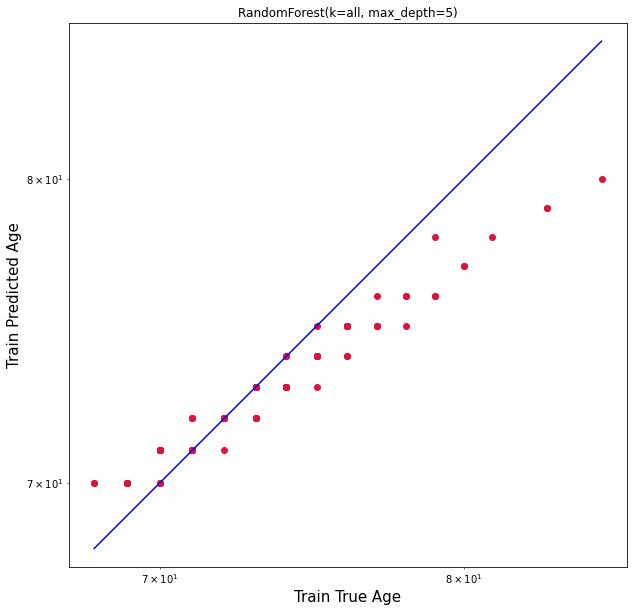

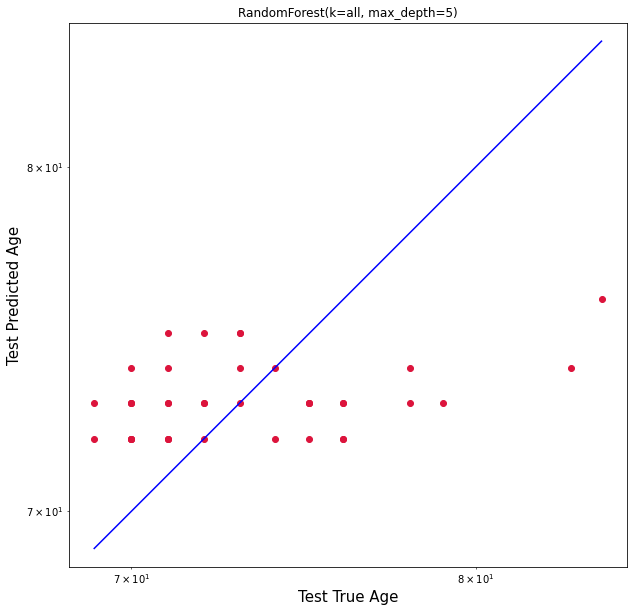

In [38]:
print(poly_x.shape)
random_forest_best = random_forest_search.best_estimator_

# Predict age
predict_train = random_forest_best.predict(x_train)
predict_test = random_forest_best.predict(x_test)

# Compute error
train_error = predict_train - y_train
test_error = predict_test - y_test

train_score = mean_absolute_error(y_train, predict_train)
test_score = mean_absolute_error(y_test, predict_test)

print(f'train_score: {train_score}')
print(f'test_score: {test_score}')

plot_results(y_train, y_test, predict_train, predict_test, {
    'k': random_forest_best.steps[0][1].get_params()["k"],
    'max_depth': random_forest_best.steps[1][1].get_params()["max_depth"]
}, 'RandomForest')

# Kernel Ridge Regression

In [83]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RepeatedKFold

In [90]:
poly = PolynomialFeatures(1)
poly_x = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(poly_x, y, test_size=0.3, random_state=42)

# Define pipeline
kernel_pipe = Pipeline(steps=[
    ('select', SelectKBest(f_regression, k=10)),
    ('regressor',  KernelRidge(kernel="sigmoid"))
])

grid = {
    'select__k': [5, 10, 50, 100, 'all'],
    'regressor__alpha': [1e0, 0.1, 1e-2, 1e-3],
    'regressor__gamma': [1e0, 0.1, 1e-2, 1e-3]
}
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

kernel_search = GridSearchCV(kernel_pipe, grid, cv=cv, n_jobs=3, verbose=10, scoring='neg_mean_absolute_error')
kernel_search.fit(x_train, y_train)

Fitting 15 folds for each of 80 candidates, totalling 1200 fits
[CV 3/15; 48/112] START regressor__alpha=0.1, regressor__gamma=0.01, select__k=10000
[CV 3/15; 48/112] END regressor__alpha=0.1, regressor__gamma=0.01, select__k=10000;, score=nan total time=   0.0s
[CV 4/15; 48/112] START regressor__alpha=0.1, regressor__gamma=0.01, select__k=10000
[CV 4/15; 48/112] END regressor__alpha=0.1, regressor__gamma=0.01, select__k=10000;, score=nan total time=   0.0s
[CV 5/15; 48/112] START regressor__alpha=0.1, regressor__gamma=0.01, select__k=10000
[CV 5/15; 48/112] END regressor__alpha=0.1, regressor__gamma=0.01, select__k=10000;, score=nan total time=   0.0s
[CV 6/15; 48/112] START regressor__alpha=0.1, regressor__gamma=0.01, select__k=10000
[CV 6/15; 48/112] END regressor__alpha=0.1, regressor__gamma=0.01, select__k=10000;, score=nan total time=   0.0s
[CV 7/15; 48/112] START regressor__alpha=0.1, regressor__gamma=0.01, select__k=10000
[CV 7/15; 48/112] END regressor__alpha=0.1, regressor__

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) 

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
 

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) 

[CV 12/15; 46/112] END regressor__alpha=0.1, regressor__gamma=0.01, select__k=100;, score=-9.793 total time=   0.0s
[CV 13/15; 46/112] START regressor__alpha=0.1, regressor__gamma=0.01, select__k=100
[CV 13/15; 46/112] END regressor__alpha=0.1, regressor__gamma=0.01, select__k=100;, score=-21.122 total time=   0.0s
[CV 14/15; 46/112] START regressor__alpha=0.1, regressor__gamma=0.01, select__k=100
[CV 14/15; 46/112] END regressor__alpha=0.1, regressor__gamma=0.01, select__k=100;, score=-47.022 total time=   0.0s
[CV 15/15; 46/112] START regressor__alpha=0.1, regressor__gamma=0.01, select__k=100
[CV 15/15; 46/112] END regressor__alpha=0.1, regressor__gamma=0.01, select__k=100;, score=-12.800 total time=   0.0s
[CV 1/15; 47/112] START regressor__alpha=0.1, regressor__gamma=0.01, select__k=1000
[CV 1/15; 47/112] END regressor__alpha=0.1, regressor__gamma=0.01, select__k=1000;, score=nan total time=   0.0s
[CV 2/15; 47/112] START regressor__alpha=0.1, regressor__gamma=0.01, select__k=1000


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.


  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encou

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coeff

[CV 8/15; 94/112] START regressor__alpha=0.001, regressor__gamma=0.1, select__k=50
[CV 8/15; 94/112] END regressor__alpha=0.001, regressor__gamma=0.1, select__k=50;, score=-20.569 total time=   0.0s
[CV 9/15; 94/112] START regressor__alpha=0.001, regressor__gamma=0.1, select__k=50
[CV 9/15; 94/112] END regressor__alpha=0.001, regressor__gamma=0.1, select__k=50;, score=-17.964 total time=   0.0s
[CV 10/15; 94/112] START regressor__alpha=0.001, regressor__gamma=0.1, select__k=50
[CV 10/15; 94/112] END regressor__alpha=0.001, regressor__gamma=0.1, select__k=50;, score=-23.115 total time=   0.0s
[CV 11/15; 94/112] START regressor__alpha=0.001, regressor__gamma=0.1, select__k=50
[CV 11/15; 94/112] END regressor__alpha=0.001, regressor__gamma=0.1, select__k=50;, score=-37.480 total time=   0.0s
[CV 12/15; 94/112] START regressor__alpha=0.001, regressor__gamma=0.1, select__k=50
[CV 12/15; 94/112] END regressor__alpha=0.001, regressor__gamma=0.1, select__k=50;, score=-4899.912 total time=   0.

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) *

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/pytho

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared)

[CV 4/15; 111/112] START regressor__alpha=0.001, regressor__gamma=0.001, select__k=10000
[CV 4/15; 111/112] END regressor__alpha=0.001, regressor__gamma=0.001, select__k=10000;, score=nan total time=   0.0s
[CV 5/15; 111/112] START regressor__alpha=0.001, regressor__gamma=0.001, select__k=10000
[CV 5/15; 111/112] END regressor__alpha=0.001, regressor__gamma=0.001, select__k=10000;, score=nan total time=   0.0s
[CV 6/15; 111/112] START regressor__alpha=0.001, regressor__gamma=0.001, select__k=10000
[CV 6/15; 111/112] END regressor__alpha=0.001, regressor__gamma=0.001, select__k=10000;, score=nan total time=   0.0s
[CV 7/15; 111/112] START regressor__alpha=0.001, regressor__gamma=0.001, select__k=10000
[CV 7/15; 111/112] END regressor__alpha=0.001, regressor__gamma=0.001, select__k=10000;, score=nan total time=   0.0s
[CV 8/15; 111/112] START regressor__alpha=0.001, regressor__gamma=0.001, select__k=10000
[CV 8/15; 111/112] END regressor__alpha=0.001, regressor__gamma=0.001, select__k=10

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in divide
  correlation_coefficient /= X_norms
/opt/homebrew/lib/pytho

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=Pipeline(steps=[('select',
                                        SelectKBest(score_func=<function f_regression at 0x15ec01a60>)),
                                       ('regressor',
                                        KernelRidge(kernel='sigmoid'))]),
             n_jobs=3,
             param_grid={'regressor__alpha': [1.0, 0.1, 0.01, 0.001],
                         'regressor__gamma': [1.0, 0.1, 0.01, 0.001],
                         'select__k': [5, 10, 50, 100, 'all']},
             scoring='neg_mean_absolute_error', verbose=10)

In [91]:
print(kernel_search.best_estimator_)
print(kernel_search.best_score_)

Pipeline(steps=[('select',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x15ec01a60>)),
                ('regressor',
                 KernelRidge(alpha=0.1, gamma=0.001, kernel='sigmoid'))])
-2.482214153497391


(133, 297)
train_score: 2.051733997079271
test_score: 1.556953429610315


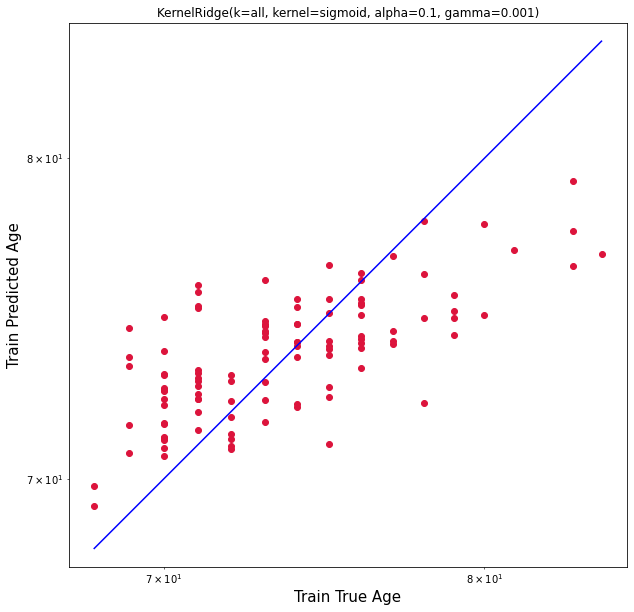

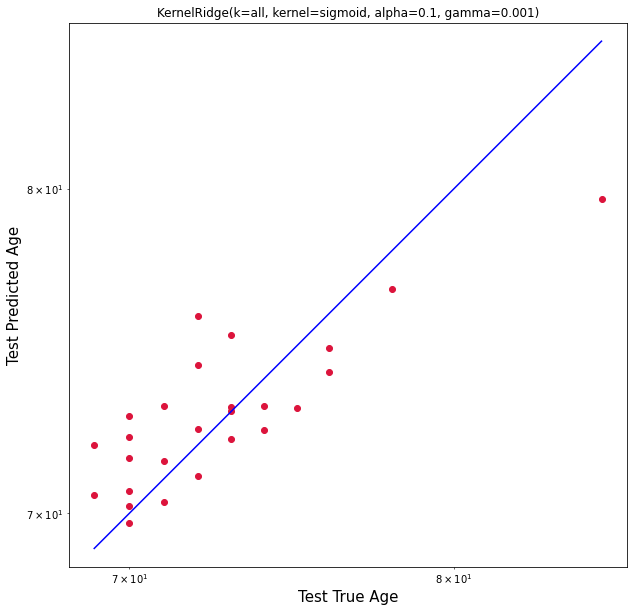

In [133]:
print(poly_x.shape)
kernel_best = kernel_search.best_estimator_

# Predict age
predict_train = kernel_best.predict(x_train)
predict_test = kernel_best.predict(x_test)

# Compute error
train_error = predict_train - y_train
test_error = predict_test - y_test

train_score = mean_absolute_error(y_train, predict_train)
test_score = mean_absolute_error(y_test, predict_test)

print(f'train_score: {train_score}')
print(f'test_score: {test_score}')

plot_results(y_train, y_test, predict_train, predict_test, {
    'k': kernel_best.steps[0][1].get_params()["k"],
    'kernel': 'sigmoid',
    'alpha': kernel_best.steps[1][1].get_params()["alpha"],
    'gamma': kernel_best.steps[1][1].get_params()["gamma"]
}, 'KernelRidge')

# Comparing KernelRidge Sigmoid with Elastic Net

In [164]:
poly = PolynomialFeatures(1)
poly_x = poly.fit_transform(x)

kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
model = KernelRidge(kernel="sigmoid", alpha=0.1, gamma=0.001)
train_scores = []
test_scores = []
for train_index, test_index in kf.split(poly_x):
    x_train, x_test = poly_x[train_index, :], poly_x[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(x_train, y_train)
    
    predict_train = model.predict(x_train)
    predict_test = model.predict(x_test)
    
    train_score = mean_absolute_error(y_train, predict_train)
    test_score = mean_absolute_error(y_test, predict_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    #print(f'train_score: {train_score}')
    #print(f'test_score: {test_score}')

print(f'train_score = {np.mean(train_scores):.2f}')
print(f'   best: {np.min(train_scores):.2f}')
print(f'   worst: {np.max(train_scores):.2f}')
print(f'test_score = {np.mean(test_scores):.2f}')
print(f'   best: {np.min(test_scores):.2f}')
print(f'   worst: {np.max(test_scores):.2f}')
model.fit(poly_x, y)
predict = model.predict(poly_x)
score = mean_absolute_error(y, predict)
print(f'global score = {score:.2f}')

train_score = 1.86
   best: 1.62
   worst: 2.12
test_score = 2.67
   best: 1.80
   worst: 3.36
global score = 2.17


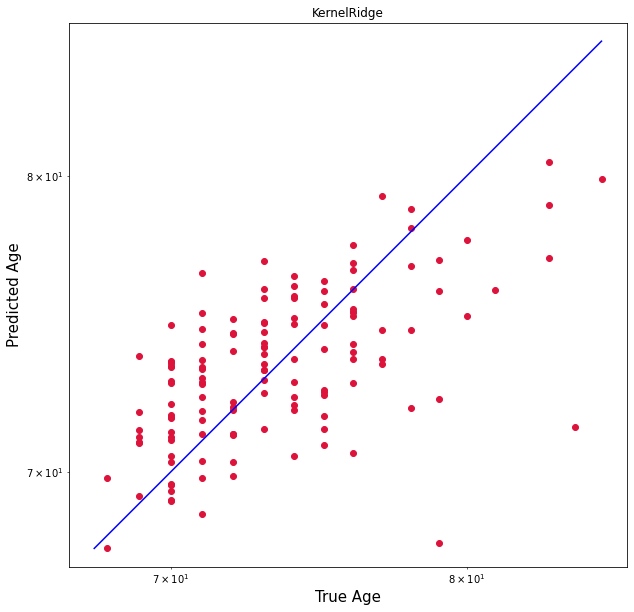

In [165]:
# Plot
plt.figure(figsize=(10,10))
plt.scatter(np.array(y, dtype='int'), predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predict), max(y))
p2 = min(min(predict), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Age', fontsize=15)
plt.ylabel('Predicted Age', fontsize=15)
plt.title('KernelRidge')
plt.axis('equal')
plt.show()

In [162]:
poly = PolynomialFeatures(1)
poly_x = poly.fit_transform(x)

kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
model = ElasticNet(alpha=0.1, l1_ratio=0.0001)
train_scores = []
test_scores = []
for train_index, test_index in kf.split(poly_x):
    x_train, x_test = poly_x[train_index, :], poly_x[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(x_train, y_train)
    
    predict_train = model.predict(x_train)
    predict_test = model.predict(x_test)
    
    train_score = mean_absolute_error(y_train, predict_train)
    test_score = mean_absolute_error(y_test, predict_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    #print(f'train_score: {train_score}')
    #print(f'test_score: {test_score}')

print(f'train_score = {np.mean(train_scores):.2f}')
print(f'   best: {np.min(train_scores):.2f}')
print(f'   worst: {np.max(train_scores):.2f}')
print(f'test_score = {np.mean(test_scores):.2f}')
print(f'   best: {np.min(test_scores):.2f}')
print(f'   worst: {np.max(test_scores):.2f}')
model.fit(poly_x, y)
predict = model.predict(poly_x)

score = mean_absolute_error(y, predict)
print(f'global score = {score:.2f}')

train_score = 0.24
   best: 0.18
   worst: 0.27
test_score = 2.73
   best: 1.99
   worst: 3.50
global score = 0.35


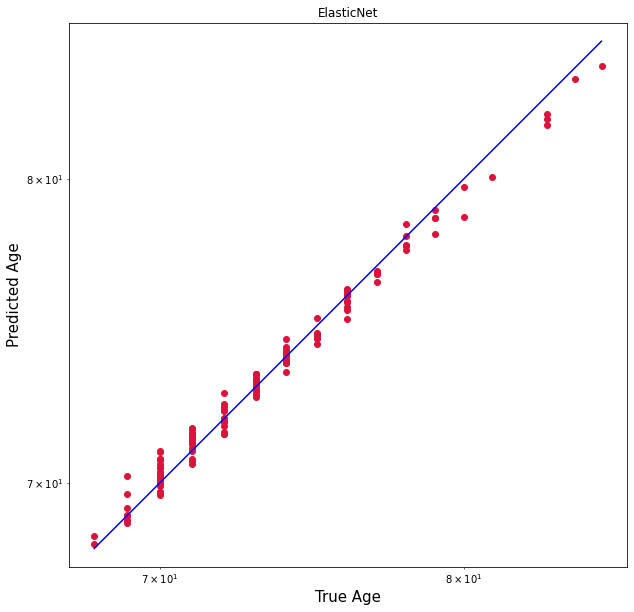

In [163]:
# Plot
plt.figure(figsize=(10,10))
plt.scatter(np.array(y, dtype='int'),predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predict), max(y))
p2 = min(min(predict), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Age', fontsize=15)
plt.ylabel('Predicted Age', fontsize=15)
plt.title('ElasticNet')
plt.axis('equal')
plt.show()